<a href="https://colab.research.google.com/github/sefahw/machine-learning-assignment/blob/main/credit_information_learnig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline


In [113]:
df=pd.read_csv('application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [114]:
df.shape

(219398, 122)

In [115]:
total= df.isnull().sum ().sort_values(ascending=False)
percent=(df.isnull().sum ()/df.isnull().count()).sort_values(ascending=False)
data =pd.concat([total,percent],axis=1, keys=['Total','percentage'])
data

,Total,percentage
COMMONAREA_MODE,153467,0.699491
COMMONAREA_AVG,153467,0.699491
COMMONAREA_MEDI,153467,0.699491
NONLIVINGAPARTMENTS_MODE,152403,0.694642
NONLIVINGAPARTMENTS_AVG,152403,0.694642
...,...,...
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
NAME_INCOME_TYPE,0,0.000000


In [116]:
features=data[data.percentage <0.1]
features

,Total,percentage
NAME_TYPE_SUITE,905,0.004125
OBS_30_CNT_SOCIAL_CIRCLE,722,0.003291
DEF_30_CNT_SOCIAL_CIRCLE,722,0.003291
OBS_60_CNT_SOCIAL_CIRCLE,722,0.003291
DEF_60_CNT_SOCIAL_CIRCLE,722,0.003291
...,...,...
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
NAME_INCOME_TYPE,0,0.000000


In [117]:
features.index

Index(['NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'DAYS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_OWN_REALTY',
       'FLAG_OWN_CAR', 'CODE_GENDER', 'NAME_CONTRACT_TYPE', 'CNT_CHILDREN',
       'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'FLAG_PHONE',
       'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'TARGET',
       'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_REGION_NO

In [118]:
df1=df[features.index]
df1.head()

,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,CNT_FAM_MEMBERS,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_12,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_OWN_REALTY,FLAG_OWN_CAR,CODE_GENDER,NAME_CONTRACT_TYPE,CNT_CHILDREN,AMT_CREDIT,AMT_INCOME_TOTAL,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_EMAIL,FLAG_CONT_MOBILE,ORGANIZATION_TYPE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR
0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,-1134.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y,N,M,Cash loans,0,406597.5,202500.0,1,0,0,1,0,0,0,0,10,WEDNESDAY,2,2,0,1,Business Entity Type 3,0,1,1,-2120,-3648.0,-637,-9461,0.018801,House / apartment,Single / not married,Secondary / secondary special,Working,100002
1,Family,1.0,0.0,1.0,0.0,0.622246,1129500.0,35698.5,-828.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,F,Cash loans,0,1293502.5,270000.0,1,0,0,0,0,0,0,0,11,MONDAY,1,1,0,1,School,0,1,1,-291,-1186.0,-1188,-16765,0.003541,House / apartment,Married,Higher education,State servant,100003
2,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,-815.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y,Y,M,Revolving loans,0,135000.0,67500.0,1,0,0,0,0,0,0,0,9,MONDAY,2,2,0,1,Government,1,1,1,-2531,-4260.0,-225,-19046,0.010032,House / apartment,Single / not married,Secondary / secondary special,Working,100004
3,Unaccompanied,2.0,0.0,2.0,0.0,0.650442,297000.0,29686.5,-617.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y,N,F,Cash loans,0,312682.5,135000.0,0,0,0,0,0,0,0,0,17,WEDNESDAY,2,2,0,1,Business Entity Type 3,0,1,1,-2437,-9833.0,-3039,-19005,0.008019,House / apartment,Civil marriage,Secondary / secondary special,Working,100006
4,Unaccompanied,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,-1106.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y,N,M,Cash loans,0,513000.0,121500.0,0,1,1,0,0,0,0,0,11,THURSDAY,2,2,0,1,Religion,0,1,1,-3458,-4311.0,-3038,-19932,0.028663,House / apartment,Single / not married,Secondary / secondary special,Working,100007


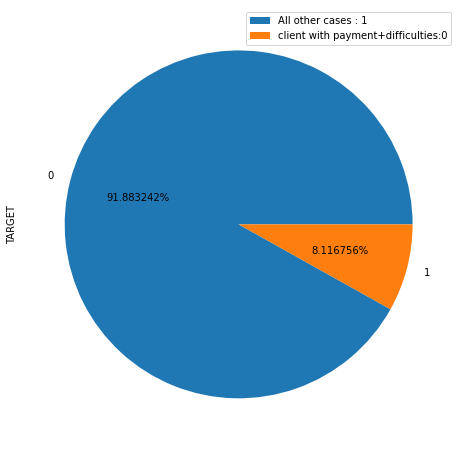

In [119]:
tg=df["TARGET"].value_counts()
plt.subplots(figsize=(12,8))
pie_target=tg.plot.pie(autopct="%1f%%")
pie_target.legend(loc=1,labels={'client with payment+difficulties:0','All other cases : 1'})
plt.show()


In [120]:
def  dummy_variable_all(df,sort_frequence=True,dropna=True,map_show=False,skip_column=[]):
     for column_name in df:
         if np.dtype(df[column_name])=="O"and column_name not in skip_column:
            if  sort_frequence:
                unique_value = df[column_name].value_counts(dropna=dropna).sort_values().index
            else:
                unique_value = df[column_name].value_counts(dropna=dropna).sort_index().index
            name_map={}
            for i, value in enumerate(unique_value):
                name_map[value]=i
            if map_show:
               print('column_name :',column_name)
               print ('replace:',name_map)
            df[column_name]=df[column_name].map(name_map)
     return df
                

In [121]:
df2=dummy_variable_all(df.copy(),dropna=False,map_show=True)
df2.fillna(df2.median(),inplace=True)


column_name : NAME_CONTRACT_TYPE
replace: {'Revolving loans': 0, 'Cash loans': 1}
column_name : CODE_GENDER
replace: {'XNA': 0, 'M': 1, 'F': 2}
column_name : FLAG_OWN_CAR
replace: {'Y': 0, 'N': 1}
column_name : FLAG_OWN_REALTY
replace: {'N': 0, 'Y': 1}
column_name : NAME_TYPE_SUITE
replace: {'Group of people': 0, 'Other_A': 1, nan: 2, 'Other_B': 3, 'Children': 4, 'Spouse, partner': 5, 'Family': 6, 'Unaccompanied': 7}
column_name : NAME_INCOME_TYPE
replace: {'Maternity leave': 0, 'Businessman': 1, 'Student': 2, 'Unemployed': 3, 'State servant': 4, 'Pensioner': 5, 'Commercial associate': 6, 'Working': 7}
column_name : NAME_EDUCATION_TYPE
replace: {'Academic degree': 0, 'Lower secondary': 1, 'Incomplete higher': 2, 'Higher education': 3, 'Secondary / secondary special': 4}
column_name : NAME_FAMILY_STATUS
replace: {'Unknown': 0, 'Widow': 1, 'Separated': 2, 'Civil marriage': 3, 'Single / not married': 4, 'Married': 5}
column_name : NAME_HOUSING_TYPE
replace: {'Co-op apartment': 0, 'Office 

In [122]:
pd.set_option('display.max_columns',None)
df2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,1,1,1,1,0,202500.0,406597.5,24700.5,351000.0,7,7,4,4,5,0.018801,-9461,-637,-3648.0,-2120,9.0,1,1,0,1,1,0,17,1.0,2,2,5,10,0,0,0,0,0,0,57,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00000,3,2,0.0149,5,2,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,1,2,1,0,0,270000.0,1293502.5,35698.5,1129500.0,6,4,3,5,5,0.003541,-16765,-1188,-1186.0,-291,9.0,1,1,0,1,1,0,15,2.0,1,1,4,11,0,0,0,0,0,0,50,0.311267,0.622246,0.535276,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01000,3,2,0.0714,4,2,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,1,0,1,0,67500.0,135000.0,6750.0,135000.0,7,7,4,4,5,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,17,1.0,2,2,4,9,0,0,0,0,0,0,51,0.505534,0.555912,0.729567,0.0876,0.0763,0.9816,0.7552,0.0210,0.00,0.1379,0.1667,0.2083,0.0482,0.0756,0.0746,0.0000,0.0036,0.0840,0.0746,0.9816,0.7648,0.0190,0.0000,0.1379,0.1667,0.2083,0.0459,0.0771,0.0731,0.0,0.0011,0.0874,0.0758,0.9816,0.7585,0.0207,0.00,0.1379,0.1667,0.2083,0.0487,0.0761,0.0750,0.0000,0.00305,4,3,0.0688,7,1,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [123]:
df2.dtypes.value_counts()

float64    85
int64      37
dtype: int64

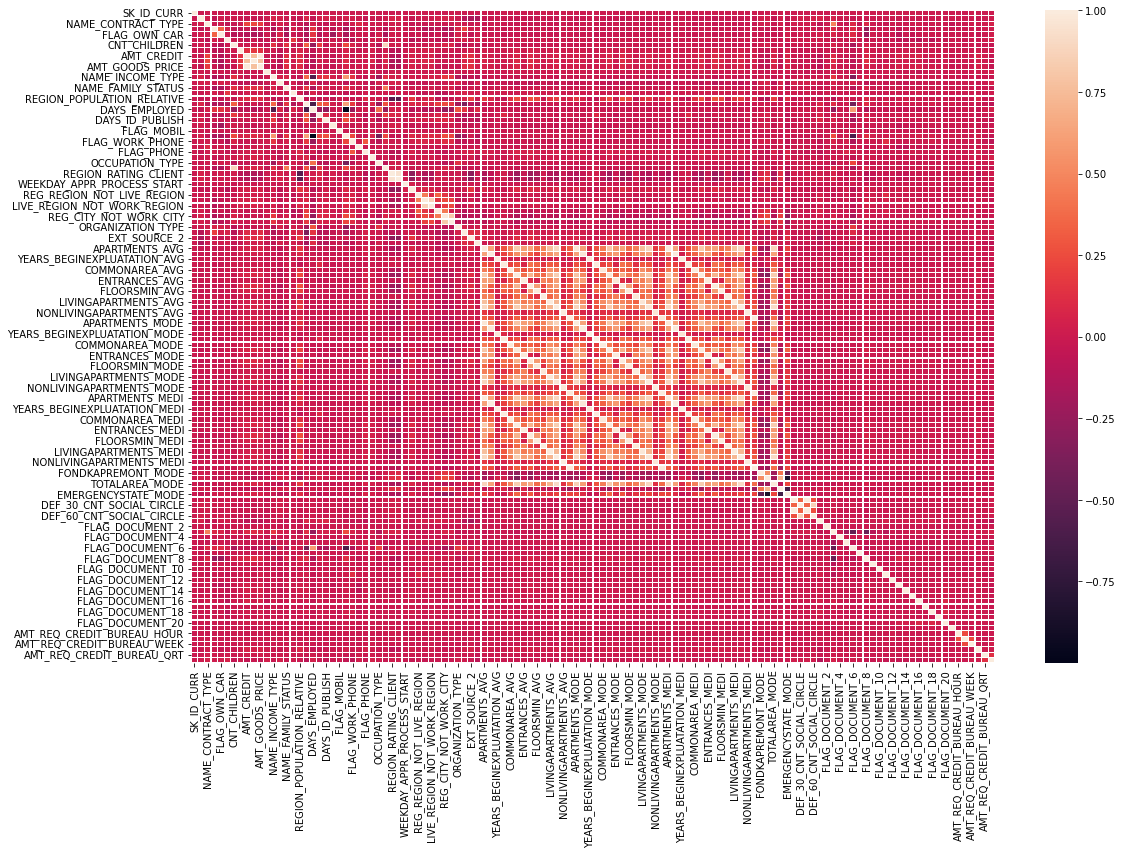

In [124]:
corr=df2.corr()
plt.subplots(figsize=(18,12))
sns.heatmap(corr,linewidth=0.1)
plt.show()

In [125]:
target_corr=abs (corr['TARGET'].copy().drop(index=['TARGET'])).sort_values(ascending=False)
target_corr

EXT_SOURCE_2                   0.160714
EXT_SOURCE_3                   0.154387
EXT_SOURCE_1                   0.097912
DAYS_BIRTH                     0.078170
REGION_RATING_CLIENT_W_CITY    0.060528
                                 ...   
ORGANIZATION_TYPE              0.000622
AMT_REQ_CREDIT_BUREAU_HOUR     0.000493
FLAG_DOCUMENT_20               0.000459
FLAG_DOCUMENT_19               0.000102
SK_ID_CURR                     0.000051
Name: TARGET, Length: 121, dtype: float64

In [126]:
x=df2[df2.columns.copy().drop('TARGET')].values
y=df2['TARGET'].values 
print(x.shape,y.shape)

(219398, 121) (219398,)


In [127]:
from sklearn.feature_selection import SelectKBest,f_classif
x_select=SelectKBest(f_classif , k=2).fit_transform(x,y)
print(x_select)


[[0.26294859 0.13937578]
 [0.62224578 0.53527625]
 [0.55591208 0.72956669]
 ...
 [0.5643062  0.162442  ]
 [0.64419143 0.66905669]
 [0.56567133 0.53527625]]


In [128]:
selected_features=[]
for i in df2.columns:
    if all(df2.loc[:,i]==x_select[:,0]) or all(df2.loc[:,i]==x_select[:,1]):
        selected_features.append(i)
print(selected_features)

['EXT_SOURCE_2', 'EXT_SOURCE_3']


In [129]:
objects=df1.select_dtypes(include=[object])
objects

,NAME_TYPE_SUITE,FLAG_OWN_REALTY,FLAG_OWN_CAR,CODE_GENDER,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE
0,Unaccompanied,Y,N,M,Cash loans,WEDNESDAY,Business Entity Type 3,House / apartment,Single / not married,Secondary / secondary special,Working
1,Family,N,N,F,Cash loans,MONDAY,School,House / apartment,Married,Higher education,State servant
2,Unaccompanied,Y,Y,M,Revolving loans,MONDAY,Government,House / apartment,Single / not married,Secondary / secondary special,Working
3,Unaccompanied,Y,N,F,Cash loans,WEDNESDAY,Business Entity Type 3,House / apartment,Civil marriage,Secondary / secondary special,Working
4,Unaccompanied,Y,N,M,Cash loans,THURSDAY,Religion,House / apartment,Single / not married,Secondary / secondary special,Working
...,...,...,...,...,...,...,...,...,...,...,...
219393,Unaccompanied,Y,N,F,Cash loans,WEDNESDAY,Kindergarten,House / apartment,Married,Secondary / secondary special,State servant
219394,Unaccompanied,N,N,F,Cash loans,SUNDAY,Construction,House / apartment,Married,Higher education,Working
219395,Unaccompanied,N,N,F,Cash loans,WEDNESDAY,Restaurant,House / apartment,Single / not married,Secondary / secondary special,Working
219396,Unaccompanied,Y,N,F,Cash loans,TUESDAY,Postal,House / apartment,Married,Higher education,State servant


In [130]:
objects.isna().sum()

NAME_TYPE_SUITE               905
FLAG_OWN_REALTY                 0
FLAG_OWN_CAR                    0
CODE_GENDER                     0
NAME_CONTRACT_TYPE              0
WEEKDAY_APPR_PROCESS_START      0
ORGANIZATION_TYPE               0
NAME_HOUSING_TYPE               0
NAME_FAMILY_STATUS              0
NAME_EDUCATION_TYPE             0
NAME_INCOME_TYPE                0
dtype: int64

In [131]:
df1['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      177333
Family              28631
Spouse, partner      8133
Children             2360
Other_B              1216
Other_A               624
Group of people       196
Name: NAME_TYPE_SUITE, dtype: int64

In [132]:
from sklearn.model_selection import train_test_split
x_train , x_test,y_train,y_test=train_test_split(x_select,y,train_size=0.75,test_size=0.25)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(164548, 2) (54850, 2) (164548,) (54850,)


In [133]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)
print(x_train)
print(x_train_scaled)
print(x_test)
print(x_test_scaled)

[[0.61727293 0.63970757]
 [0.52652421 0.27213368]
 [0.72803209 0.53527625]
 ...
 [0.55133492 0.53527625]
 [0.26029575 0.53527625]
 [0.69708784 0.72527643]]
[[ 0.53840558  0.70889741]
 [ 0.06299321 -1.39682273]
 [ 1.11864816  0.11064183]
 ...
 [ 0.192971    0.11064183]
 [-1.3317184   0.11064183]
 [ 0.95653813  1.19909569]]
[[0.07405067 0.41534714]
 [0.49041959 0.56560798]
 [0.705566   0.53527625]
 ...
 [0.6043925  0.48124934]
 [0.76105759 0.53527625]
 [0.44324423 0.35563872]]
[[-2.30741497 -0.57639592]
 [-0.12615085  0.28440318]
 [ 1.00095334  0.11064183]
 ...
 [ 0.47092789 -0.19886208]
 [ 1.29166139  0.11064183]
 [-0.37329206 -0.91844753]]


In [134]:
from sklearn.metrics import *
def evaluation(test,predict):
  acc_score=accuracy_score(test,predict)
  prec_score=precision_score(test,predict)
  rec_score=recall_score(test,predict)
  f_score=f1_score(test,predict)
  conf_matrix=confusion_matrix(test,predict)
  print('Accuracy:{:.3f}'.format(acc_score))
  print('Precision:{:.3f}'.format(prec_score))
  print('Recall:{:.3f}'.format(rec_score))
  print('F:{:.3f}'.format(f_score))
  print('Confussion matrix: in',conf_matrix)

In [135]:
from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_scaled,y_train)
predict_3=neigh.predict(x_test_scaled)
evaluation(y_test,ppredict_3)

Accuracy:0.895
Precision:0.071
Recall:0.025
F:0.036
Confussion matrix: in [[48977  1437]
 [ 4327   109]]


In [136]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train_scaled,y_train)
dtree_predict=dtree.predict(x_test_scaled)
evaluation(y_test,dtree_predict) 

Accuracy:0.856
Precision:0.124
Recall:0.128
F:0.126
Confussion matrix: in [[46402  4012]
 [ 3867   569]]


In [137]:
from sklearn.ensemble import RandomForestClassifier
rforest=RandomForestClassifier()
rforest.fit(x_train_scaled,y_train)
rforest_predict=rforest.predict(x_test_scaled)
evaluation(y_test,rforest_predict)

Accuracy:0.889
Precision:0.149
Recall:0.079
F:0.103
Confussion matrix: in [[48410  2004]
 [ 4086   350]]


In [138]:
neigh_prob=neigh.predict_proba(x_test_scaled)
print("KNeighborsClassifier probas :")
print(neigh_prob)

dtree_prob=dtree.predict_proba(x_test_scaled)
print("DecisionTreeClassifier probes :")
print(dtree_prob)

rforest_prob=rforest.predict_proba(x_test_scaled)
print("RandomForestClassifier probe:")
print(rforest_prob)

KNeighborsClassifier probas :
[[1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 ...
 [0.66666667 0.33333333]
 [1.         0.        ]
 [0.66666667 0.33333333]]
DecisionTreeClassifier probes :
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
RandomForestClassifier probe:
[[0.73 0.27]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [0.85 0.15]
 [1.   0.  ]
 [1.   0.  ]]


In [139]:
average_prob=(neigh_prob+ dtree_prob+ rforest_prob)/3
average_prob

array([[0.91      , 0.09      ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.83888889, 0.16111111],
       [1.        , 0.        ],
       [0.88888889, 0.11111111]])

In [140]:
df_test=pd.read_csv('application_test.csv')
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Marr

In [141]:
x_test_file=df_test[selected_features].values

x_test_file_scaled=scaler.transform(x_test_file)
x_test_scaled

array([[-2.30741497, -0.57639592],
       [-0.12615085,  0.28440318],
       [ 1.00095334,  0.11064183],
       ...,
       [ 0.47092789, -0.19886208],
       [ 1.29166139,  0.11064183],
       [-0.37329206, -0.91844753]])

In [142]:
x_test_scaled_finite=x_test_file_scaled[np.all(np.isfinite(x_test_file_scaled),axis=1)]
neigh_prob=neigh.predict_proba(x_test_scaled_finite)
dtree_prob=dtree.predict_proba(x_test_scaled_finite)
rforest_prob=rforest.predict_proba(x_test_scaled_finite)
average_prob=(neigh_prob+ dtree_prob+ rforest_prob)/3
predict_res=1-average_prob[:,0] 

In [144]:

pred=pd.Series(predict_res,name='TARGET')
final=pd.concat([df_test['SK_ID_CURR'],pred],axis=1)
final

,SK_ID_CURR,TARGET
0,100001,0.006667
1,100005,0.127778
2,100013,0.003333
3,100028,0.003333
4,100038,0.000000
...,...,...
48739,456221,NaN
48740,456222,NaN
48741,456223,NaN
48742,456224,NaN


In [148]:
final.to_csv('final_output_csv_file.csv',index=False)

In [146]:
pd.read_csv('final_output_csv_file.csv')

,SK_ID_CURR,TARGET
0,100001,0.006667
1,100005,0.127778
2,100013,0.003333
3,100028,0.003333
4,100038,0.000000
...,...,...
48739,456221,NaN
48740,456222,NaN
48741,456223,NaN
48742,456224,NaN
